<a href="https://colab.research.google.com/github/Charles20239/Credit_Card_Default_Prediction/blob/main/LogicRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('default_of_credit_card_clients.csv', header=1)

In [4]:
# show data
data.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# show data information
data.shape

(30000, 25)

In [6]:
# show data information
data.describe

<bound method NDFrame.describe of           ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...

In [7]:
# check missing value
missing_values = data.isnull().sum()
missing_values

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [8]:
# adjust "EDUCATION" column
data["EDUCATION"] = data["EDUCATION"].replace({0:4, 5:4 ,6:4})
# adjust "MARRIAGE" column
data["MARRIAGE"] = data["MARRIAGE"].replace({0:3})



In [9]:
data["EDUCATION"]

0        2
1        2
2        2
3        2
4        2
        ..
29995    3
29996    3
29997    2
29998    3
29999    2
Name: EDUCATION, Length: 30000, dtype: int64

In [10]:
data["MARRIAGE"]

0        1
1        2
2        2
3        1
4        1
        ..
29995    1
29996    2
29997    2
29998    1
29999    1
Name: MARRIAGE, Length: 30000, dtype: int64

In [11]:
# check the unique date to confirm changes
education_unique_values = data["EDUCATION"].unique()
marriage_unique_values = data["MARRIAGE"].unique()

education_unique_values, marriage_unique_values

(array([2, 1, 3, 4]), array([1, 2, 3]))

In [12]:
# chech sex(X2) information
sex_distribution = data["SEX"].value_counts()
sex_distribution

2    18112
1    11888
Name: SEX, dtype: int64

In [13]:
# chech education(X3) information
education_distribution = data["EDUCATION"].value_counts()
education_distribution

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [14]:
# chech marriage(X4) information
marriage_distribution = data["MARRIAGE"].value_counts()
marriage_distribution

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [15]:
# chech target label(Y) information
target_distribution = data["default payment next month"].value_counts()
target_distribution

0    23364
1     6636
Name: default payment next month, dtype: int64

**Data process finished!**

**Start training model!**

In [16]:
from sklearn.model_selection import train_test_split

# split data into features (X) and target (Y)
X = data.drop(["ID","default payment next month"],axis = 1)  # exclude the last column (the target) and the first two rows (header)
Y = data["default payment next month"]  # last column is the target variable

# split data into training and testing sets (70% training, 30% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((21000, 23), (9000, 23), (21000,), (9000,))

In [17]:
# check train and tes data type
y_train_data_type = Y_train.dtype
y_test_data_type = Y_test.dtype

y_train_data_type, y_test_data_type

(dtype('int64'), dtype('int64'))

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# initialize the logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# train the model
logistic_model.fit(X_train_scaled, Y_train)

# predict on the test set
Y_pred = logistic_model.predict(X_test_scaled)


In [21]:
# show performance
class_report = classification_report(Y_test, Y_pred)
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      7009
           1       0.69      0.24      0.35      1991

    accuracy                           0.81      9000
   macro avg       0.76      0.60      0.62      9000
weighted avg       0.79      0.81      0.77      9000



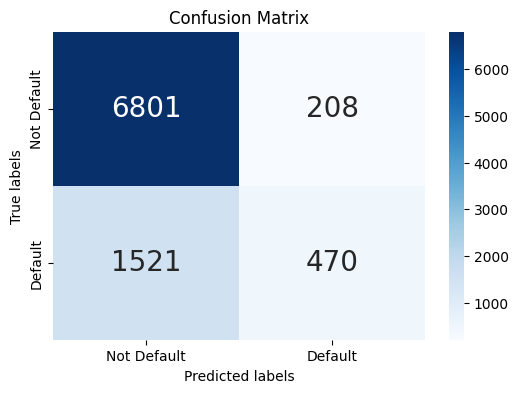

In [22]:
# confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True,annot_kws={"size": 20}, fmt="d", cmap="Blues", xticklabels=['Not Default', 'Default'], yticklabels=['Not Default', 'Default'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


**Start again with balanced data**

In [23]:
# from sklearn import metrics
# import numpy as np

# print("Explained Variance Score: ",
#     metrics.explained_variance_score(Y_test, Y_pred))
# print('Mean Absolute Error:',
#     metrics.mean_absolute_error(Y_test, Y_pred))
# print('Mean Squared Error:',
#     metrics.mean_squared_error(Y_test, Y_pred))
# print('Root Mean Squared Error:',
#     np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
# print('R^2 score:',
#     metrics.r2_score(Y_test, Y_pred))

In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_resampled, Y_resampled = smote.fit_resample(X_train_scaled, Y_train)



In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# initialize the logistic regression model
logistic_model_1 = LogisticRegression(max_iter=1000, random_state=42)

# train the model
logistic_model_1.fit(X_resampled, Y_resampled)

# predict on the test set
Y_pred = logistic_model_1.predict(X_test_scaled)

In [26]:
# show performance
class_report = classification_report(Y_test, Y_pred)
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.68      0.76      7009
           1       0.36      0.64      0.46      1991

    accuracy                           0.67      9000
   macro avg       0.62      0.66      0.61      9000
weighted avg       0.76      0.67      0.70      9000



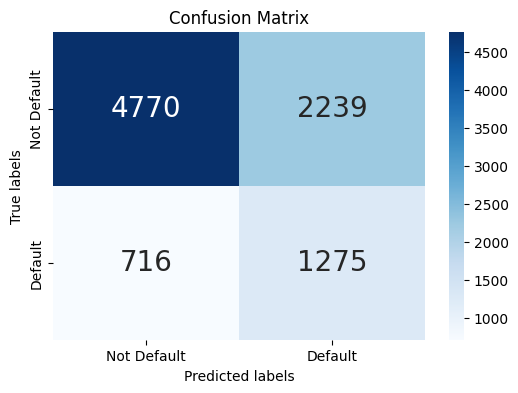

In [27]:
# confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True,annot_kws={"size": 20}, fmt="d", cmap="Blues", xticklabels=['Not Default', 'Default'], yticklabels=['Not Default', 'Default'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**Model with Cross-Validation(unbalanced data)**

In [28]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [29]:
# define data
X_grid = X_train_scaled
Y_grid = Y_train

In [30]:
model = LogisticRegression()

In [31]:
# define parameters need to be tested
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
    'class_weight': [None, 'balanced', {0: 0.3, 1: 0.7}, {0: 0.4, 1: 0.6}, {0: 0.5, 1: 0.5}],
    'max_iter': [10, 25, 50, 100, 250, 500]
}

In [32]:
# define grid search
grid_search = GridSearchCV(
    model, param_grid, cv=5, verbose=1, n_jobs=-1, scoring='accuracy'
)

In [33]:
# start grid search
grid_search.fit(X_grid, Y_grid)

Fitting 5 folds for each of 4800 candidates, totalling 24000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10800 fits failed out of a total of 24000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueErro

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': [None, 'balanced', {0: 0.3, 1: 0.7},
                                          {0: 0.4, 1: 0.6}, {0: 0.5, 1: 0.5}],
                         'max_iter': [10, 25, 50, 100, 250, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=1)

In [34]:
# show best parameters
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_parameters)
print("Best Score:", best_score)

Best Parameters: {'C': 0.01, 'class_weight': {0: 0.4, 1: 0.6}, 'max_iter': 25, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.8190476190476191


In [35]:
# use best parameters to train model
best_model = LogisticRegression(**best_parameters)
best_model.fit(X_train_scaled, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.01, class_weight={0: 0.4, 1: 0.6}, max_iter=25,
                   penalty='l1', solver='saga')

In [36]:
# use best parameters to predict model
Y_pred_LRgrid = best_model.predict(X_test_scaled)

In [37]:
# show performance
class_report = classification_report(Y_test, Y_pred_LRgrid)
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.65      0.34      0.45      1991

    accuracy                           0.81      9000
   macro avg       0.74      0.65      0.67      9000
weighted avg       0.80      0.81      0.79      9000



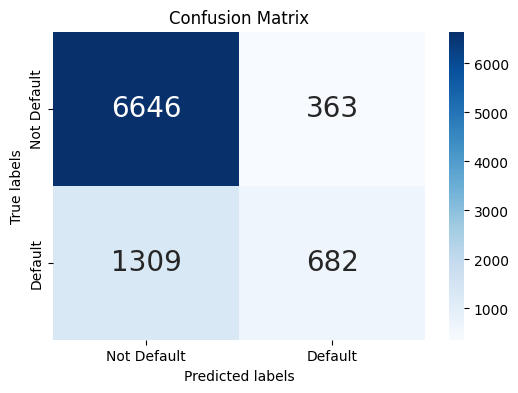

In [38]:
# confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred_LRgrid)

# plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True,annot_kws={"size": 20}, fmt="d", cmap="Blues", xticklabels=['Not Default', 'Default'], yticklabels=['Not Default', 'Default'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**Model with Cross-Validation(balanced data)**

In [39]:
X_grid_balan = X_resampled
Y_grid_balan = Y_resampled

In [40]:
# start grid search
grid_search.fit(X_grid_balan, Y_grid_balan)

Fitting 5 folds for each of 4800 candidates, totalling 24000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10800 fits failed out of a total of 24000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueErro

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': [None, 'balanced', {0: 0.3, 1: 0.7},
                                          {0: 0.4, 1: 0.6}, {0: 0.5, 1: 0.5}],
                         'max_iter': [10, 25, 50, 100, 250, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=1)

In [41]:
# show best parameters
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_parameters)
print("Best Score:", best_score)

Best Parameters: {'C': 0.001, 'class_weight': None, 'max_iter': 50, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.691715071843473


In [42]:
# use best parameters to train model
best_model = LogisticRegression(**best_parameters)
best_model.fit(X_grid_balan, Y_grid_balan)

LogisticRegression(C=0.001, max_iter=50, penalty='l1', solver='saga')

In [43]:
# use best parameters to predict model
Y_pred_LRgrid_ba = best_model.predict(X_test_scaled)

In [44]:
# show performance
class_report = classification_report(Y_test, Y_pred_LRgrid_ba)
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.72      0.79      7009
           1       0.39      0.63      0.48      1991

    accuracy                           0.70      9000
   macro avg       0.63      0.67      0.63      9000
weighted avg       0.77      0.70      0.72      9000



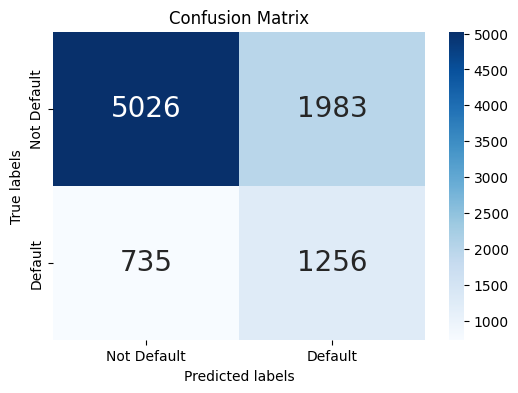

In [45]:
# confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred_LRgrid_ba)

# plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True,annot_kws={"size": 20}, fmt="d", cmap="Blues", xticklabels=['Not Default', 'Default'], yticklabels=['Not Default', 'Default'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**Plot the result respectively**

**Result with unbalanced data**

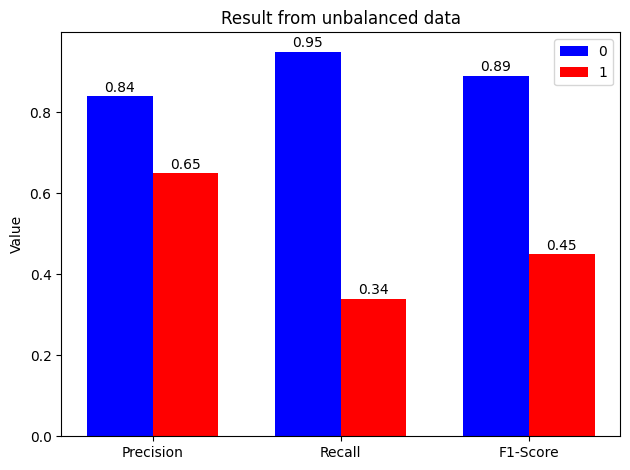

In [64]:
# load data
labels = ['Precision', 'Recall', 'F1-Score']
group1_data = [0.84, 0.95, 0.89]
group2_data = [0.65, 0.34, 0.45]

x = np.arange(len(labels))  # label position
width = 0.35  # width of column

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, group1_data, width, label='0', color='b')
rects2 = ax.bar(x + width/2, group2_data, width, label='1', color='r')

# add text, title
ax.set_ylabel('Value')
ax.set_title('Result from unbalanced data')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# add label to each column
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),  # vertical shift
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


**Result with balanced data**

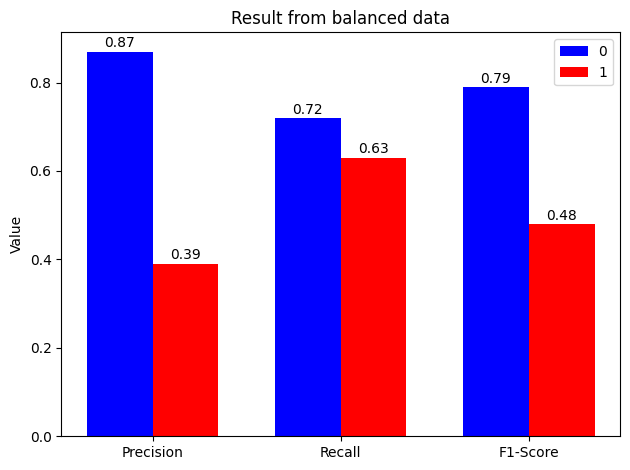

In [63]:
# load data
labels = ['Precision', 'Recall', 'F1-Score']
group1_data = [0.87, 0.72, 0.79]
group2_data = [0.39, 0.63, 0.48]

x = np.arange(len(labels))  # label position
width = 0.35  # width of column

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, group1_data, width, label='0', color='b')
rects2 = ax.bar(x + width/2, group2_data, width, label='1', color='r')

# add text, title
ax.set_ylabel('Value')
ax.set_title('Result from balanced data')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# add label to each column
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),  # vertical shift
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


**Other result include macro average and weighted average**

**Macro average**

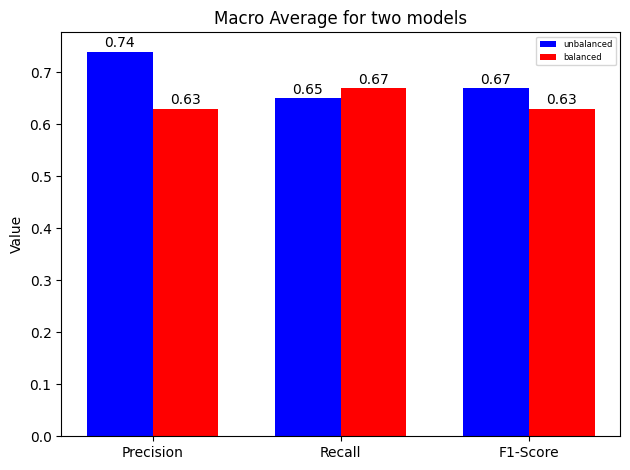

In [73]:
# load data
labels = ['Precision', 'Recall', 'F1-Score']
group1_data = [0.74, 0.65, 0.67]
group2_data = [0.63, 0.67, 0.63]

x = np.arange(len(labels))  # label position
width = 0.35  # width of column

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, group1_data, width, label='unbalanced', color='b')
rects2 = ax.bar(x + width/2, group2_data, width, label='balanced', color='r')

# add text, title
ax.set_ylabel('Value')
ax.set_title('Macro Average for two models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(prop={'size': 6})

# add label to each column
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),  # vertical shift
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


**Weighted Average**

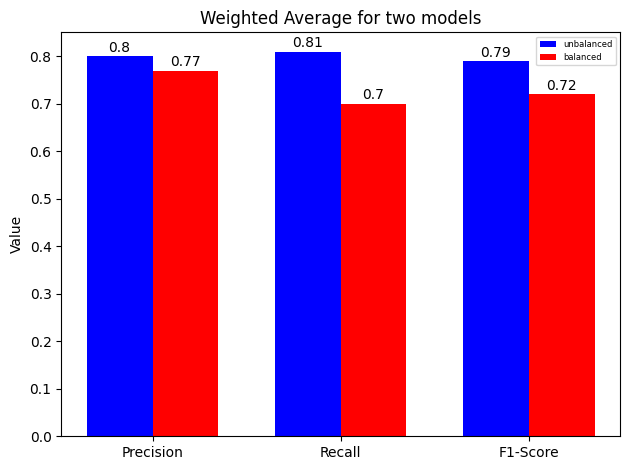

In [75]:
# load data
labels = ['Precision', 'Recall', 'F1-Score']
group1_data = [0.80, 0.81, 0.79]
group2_data = [0.77, 0.70, 0.72]

x = np.arange(len(labels))  # label position
width = 0.35  # width of column

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, group1_data, width, label='unbalanced', color='b')
rects2 = ax.bar(x + width/2, group2_data, width, label='balanced', color='r')

# add text, title
ax.set_ylabel('Value')
ax.set_title('Weighted Average for two models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(prop={'size': 6})

# add label to each column
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),  # vertical shift
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
